In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("/kaggle/input/placement-prediction-dataset/placementdata.csv")  # Change to your dataset file


In [7]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [8]:
# Drop StudentID as it's not useful for prediction
df.drop(columns=["StudentID"], inplace=True)

In [9]:
# Encode categorical variables (Yes -> 1, No -> 0)
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].map({"Yes": 1, "No": 0})
df["PlacementTraining"] = df["PlacementTraining"].map({"Yes": 1, "No": 0})

In [10]:
# Encode target variable (Placed = 1, Not Placed = 0)
df["PlacementStatus"] = df["PlacementStatus"].map({"Placed": 1, "NotPlaced": 0})

In [11]:
# Splitting Features and Target Variable
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

In [12]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [18]:
# Model Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000

Accuracy: 0.7945


In [19]:
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1172
           1       0.66      0.69      0.68       828

    accuracy                           0.73      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.73      0.72      0.73      2000

Accuracy: 0.725


In [20]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1172
           1       0.74      0.72      0.73       828

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000

Accuracy: 0.782


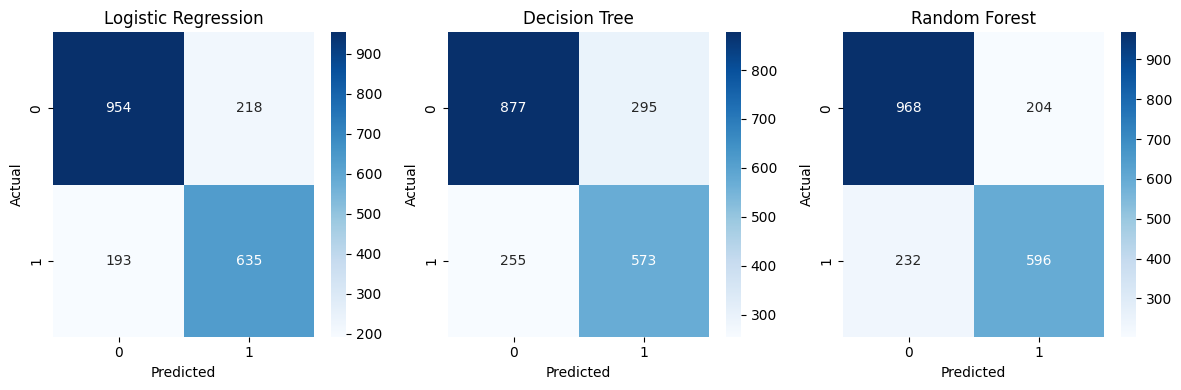

In [21]:
# Confusion Matrix Visualization
plt.figure(figsize=(12, 4))
for i, (model, y_pred, title) in enumerate(zip(
    [log_reg, dt_model, rf_model],
    [y_pred_log, y_pred_dt, y_pred_rf],
    ["Logistic Regression", "Decision Tree", "Random Forest"]
)):
    plt.subplot(1, 3, i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1160
           1       0.78      0.78      0.78      1162

    accuracy                           0.78      2322
   macro avg       0.78      0.78      0.78      2322
weighted avg       0.78      0.78      0.78      2322

Accuracy: 0.7782084409991387

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1160
           1       0.72      0.73      0.73      1162

    accuracy                           0.72      2322
   macro avg       0.72      0.72      0.72      2322
weighted avg       0.72      0.72      0.72      2322

Accuracy: 0.7235142118863049

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1160
           1       0.79      0.78      0.79      1162

    accuracy                      

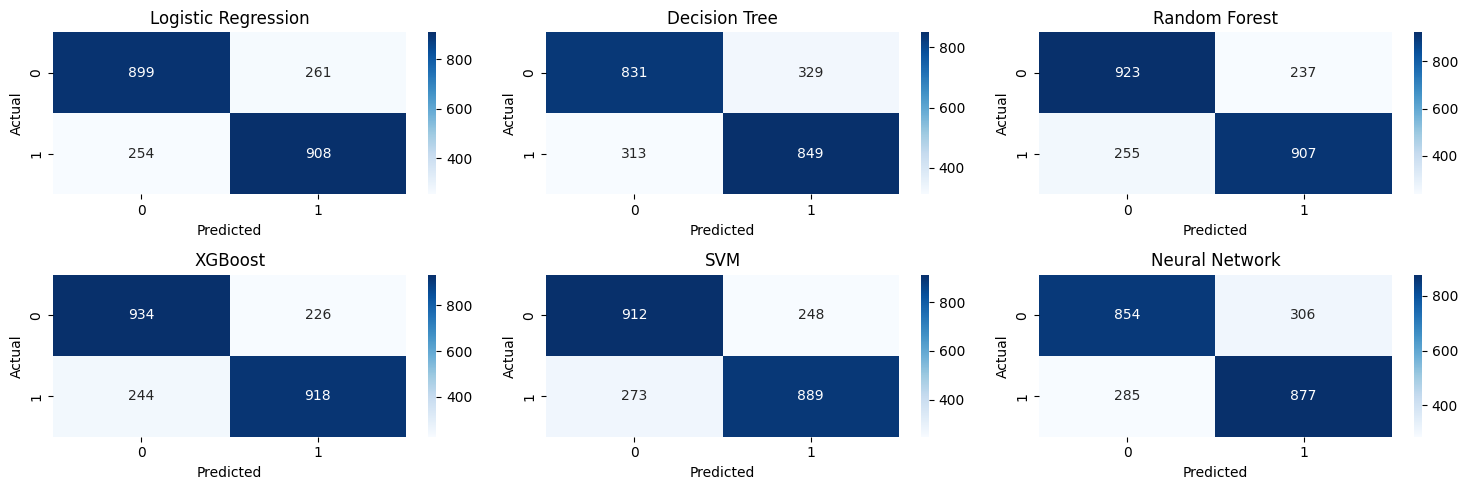

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load Dataset
df = pd.read_csv("/kaggle/input/placement-prediction-dataset/placementdata.csv")  # Update with actual file path
df.drop(columns=["StudentID"], inplace=True)

# Encode categorical variables
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].map({"Yes": 1, "No": 0})
df["PlacementTraining"] = df["PlacementTraining"].map({"Yes": 1, "No": 0})
df["PlacementStatus"] = df["PlacementStatus"].map({"Placed": 1, "NotPlaced": 0})

# Splitting Features and Target Variable
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "SVM": SVC(kernel="rbf", C=1, gamma="scale"),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), activation="relu", solver="adam", max_iter=500)
}

# Training and Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    plt.subplot(2, 3, i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define the parameter grids
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

param_grid_nn = {
    'hidden_layer_sizes': [(50,50), (100,100), (64,32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [200, 500],
    'learning_rate': ['constant', 'adaptive']
}

# RandomizedSearchCV for Random Forest
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_search.best_params_)

# RandomizedSearchCV for XGBoost
xgb = XGBClassifier(random_state=42)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_grid_xgb, n_iter=10, cv=3, random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_search.best_params_)

# RandomizedSearchCV for Neural Network
nn = MLPClassifier(random_state=42)
nn_search = RandomizedSearchCV(nn, param_distributions=param_grid_nn, n_iter=10, cv=3, random_state=42, n_jobs=-1)
nn_search.fit(X_train, y_train)
print("Best Neural Network Parameters:", nn_search.best_params_)

# Train models with the best parameters found
rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_
nn_best = nn_search.best_estimator_

# Evaluate the performance
models = [("Random Forest", rf_best), ("XGBoost", xgb_best), ("Neural Network", nn_best)]
for name, model in models:
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Neural Network Parameters: {'solver': 'sgd', 'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1160
           1       0.80      0.78      0.79      1162

    accuracy                           0.79      2322
   macro avg       0.79      0.79      0.79      2322
weighted avg       0.79      0.79      0.79      2322

Accuracy: 0.7885443583118001

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1160
           1       0.81      0.80      0.81      1162

    accuracy    

In [26]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you've already trained your model as `xgb_best`
# Example: Use the XGBoost model `xgb_best`

# Function to predict the PlacementStatus based on user input
def predict_placement():
    # User input for the features
    print("Enter the following details:")

    CGPA = float(input("CGPA: "))
    Internships = int(input("Number of Internships: "))
    Projects = int(input("Number of Projects: "))
    Workshops_Certifications = int(input("Number of Workshops/Certifications: "))
    AptitudeTestScore = int(input("Aptitude Test Score (0-100): "))
    SoftSkillsRating = float(input("Soft Skills Rating (0-5): "))
    ExtracurricularActivities = input("Extracurricular Activities (Yes/No): ")
    PlacementTraining = input("Placement Training (Yes/No): ")
    SSC_Marks = float(input("SSC Marks (0-100): "))
    HSC_Marks = float(input("HSC Marks (0-100): "))

    # Convert categorical inputs to numerical
    ExtracurricularActivities = 1 if ExtracurricularActivities.lower() == 'yes' else 0
    PlacementTraining = 1 if PlacementTraining.lower() == 'yes' else 0

    # Creating the input feature vector
    input_data = np.array([[
        CGPA,
        Internships,
        Projects,
        Workshops_Certifications,
        AptitudeTestScore,
        SoftSkillsRating,
        ExtracurricularActivities,
        PlacementTraining,
        SSC_Marks,
        HSC_Marks
    ]])

    # Standardize the input features (use the same scaler fitted on the training data)
    scaler = StandardScaler()  # Assuming the scaler was previously fitted on the training data
    input_data_scaled = scaler.fit_transform(input_data)

    # Prediction using the trained model
    prediction = xgb_best.predict(input_data_scaled)

    # Output the result
    if prediction == 1:
        print("Prediction: Placed")
    else:
        print("Prediction: Not Placed")

# Call the function to input and predict
predict_placement()


Enter the following details:


CGPA:  8.5
Number of Internships:  1
Number of Projects:  3
Number of Workshops/Certifications:  5
Aptitude Test Score (0-100):  90
Soft Skills Rating (0-5):  5
Extracurricular Activities (Yes/No):  No
Placement Training (Yes/No):  Yes
SSC Marks (0-100):  100
HSC Marks (0-100):  97.3


Prediction: Placed


In [27]:
import joblib

# Save the model to a file
joblib.dump(xgb_best, 'xgb_best_model.pkl')


['xgb_best_model.pkl']

In [28]:
import pickle

# Save the trained model to a .pkl file
with open('xgb_best_model.pkl', 'wb') as file:
    pickle.dump(model, file)
